In [10]:
#Run this! It is required set up 
from sklearn.cluster import KMeans, MeanShift
from sklearn.preprocessing import LabelBinarizer, StandardScaler, maxabs_scale
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy import stats
from scipy.stats import gamma
#Probably want to add a year scaling function to the number of bins (This was not done and probably will never be done)
def graph_patents(df, patentnumber):
    cdmapatent = df.loc[df['Pub'] == patentnumber]
    graphlist = cdmapatent['Cited_Date'].apply(sanitize).to_list()
    #print(graphlist)
    n,bins,patches = plt.hist(graphlist,bins = 15, width = 0.75)
    plt.title("Patent Citations for US Patent " +  patentnumber)
    plt.xlabel("Year")
    plt.ylabel("Number of Citations")
    plt.xlim([min(graphlist)+1,max(graphlist)+1])
    #plt.savefig(patentnumber +".png")
    plt.show()
def graph_gamma(df, patentnumber):
    cdmapatent = df.loc[df['Pub'] == patentnumber]
    graphlist = cdmapatent['Cited_Date'].apply(sanitize).to_list()
    #print(graphlist)
    graphlist = sorted(graphlist)
    a = 1
    pdf_gamma = stats.gamma.pdf(graphlist, a, loc = 1990, scale = 0.5)
    plt.plot(graphlist, pdf_gamma)
    plt.title("Gamma Distribution of patent Citations for US Patent " + patentnumber)
    plt.xlabel("Year")
    plt.ylabel("Density")
    plt.show()
def graph_range(startyear, startindex, clusternumber, clustering):
    count = 0
    df = pd.read_csv("/home/jayden/Code/PatentAnalysis/patent_results" + str(startyear) + "-" + str(startyear+2)+".csv")
    temp = pd.read_csv(str(startyear)+"-"+str(startyear+2)+"/"+"clustering"+str(startyear) + "-" + str(startyear+2) + ".csv")
    pub_codes = clustering['Pub'].to_list()[startindex: startindex+len(temp.index)]
    sliced = label[startindex: startindex+len(temp.index)]

    for i in sliced:
        if i == clusternumber:
            graph_patents(df, pub_codes[count])
            #graph_gamma(df, pub_codes[count])
        count +=1
    return startindex+len(temp.index)
def sanitize(date):
    date = int(str(date)[:4])
    return date

In [2]:
#This cell cleans up the master clustering file
clustering_unified = pd.read_csv("clustering_master.csv")
clustering_unified = clustering_unified[clustering_unified.Time != "Time"]
clustering_backup = clustering_unified
clustering_unified = clustering_unified.drop(columns = ["Pub", "Unnamed: 0"],axis = 1)
#clustering_unified = StandardScaler().fit_transform(clustering_unified)
#clustering_unified = maxabs_scale(clustering_unified)
clustering_backup = clustering_backup.drop(columns = ["Unnamed: 0"])


In [5]:
#This cells performs the clustering algorithm on the aggregated clustering data

#kmeans = MeanShift()
kmeans = KMeans(n_clusters = 3, random_state = 0, n_init = "auto")
label = kmeans.fit_predict(clustering_unified)
clustering_backup['Cluster'] = label

206
               Pub Time Time_10 Time_90 Time_100  Cluster
0     US-5223409-A   13      12      28        1        0
1     US-5530101-A   15      12      28        2        2
2     US-5225539-A   18      16      32        1        2
3     US-5569825-A   14      11      26        2        0
4     US-5143854-A   12       8      25        4        0
..             ...  ...     ...     ...      ...      ...
926  US-6450989-B2   17       7      19        3        0
927   US-6108703-A   15       4      20        5        1
928   US-6006264-A   13       3      20        5        1
929   US-6121009-A   15       7      20        3        0
930  US-7118582-B1   13       7      15        3        1

[927 rows x 6 columns]


Patents from: 1990-1992


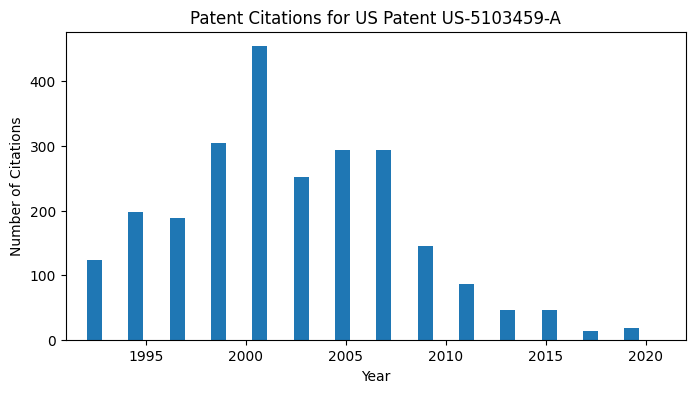

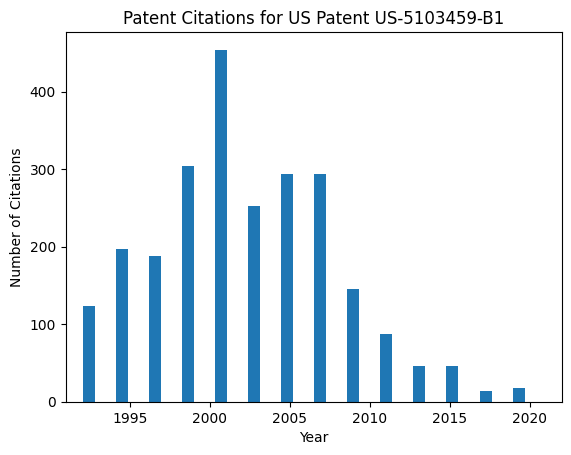

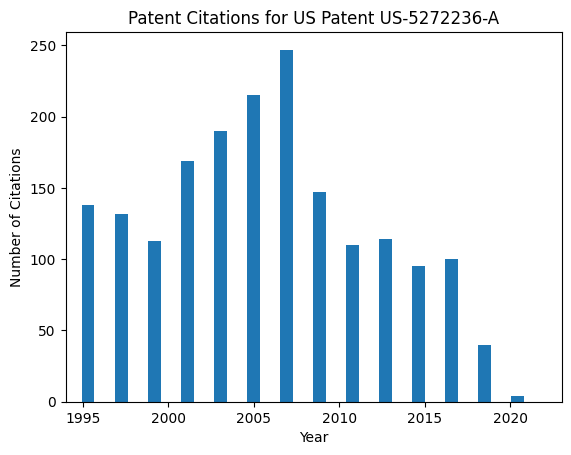

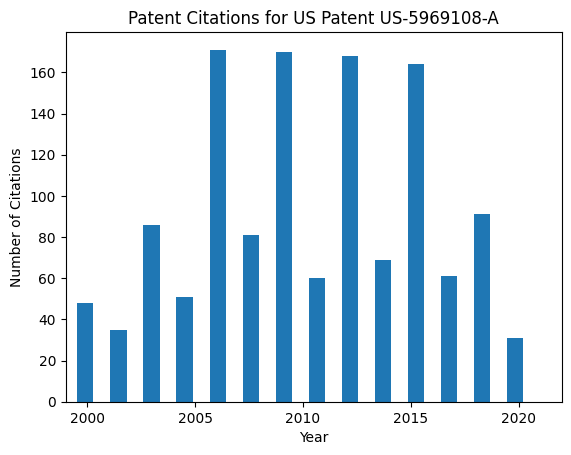

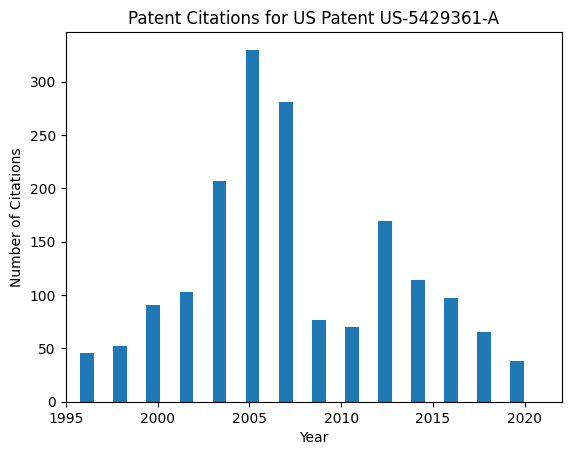

Patents from: 1992-1994


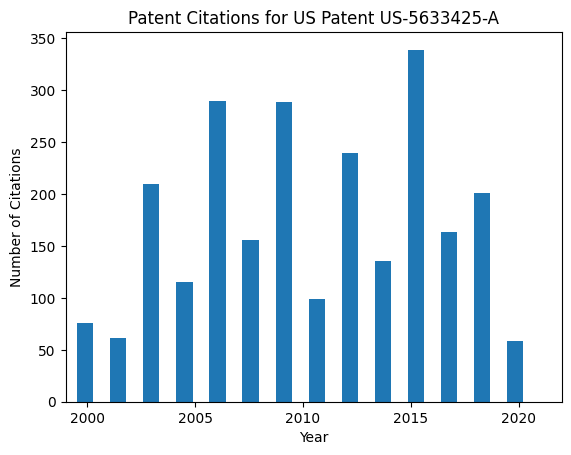

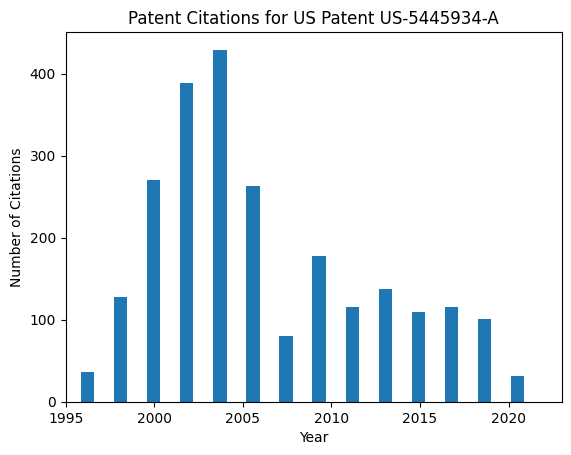

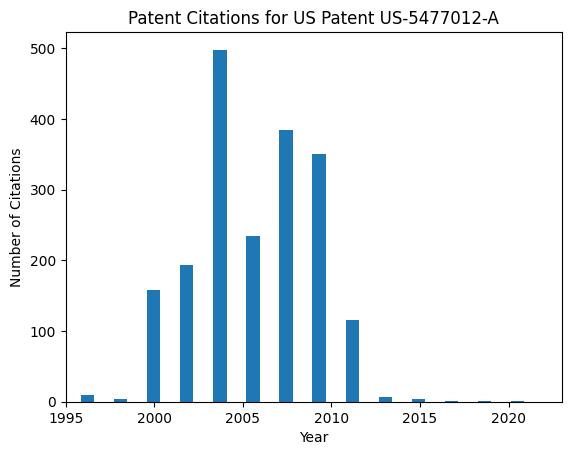

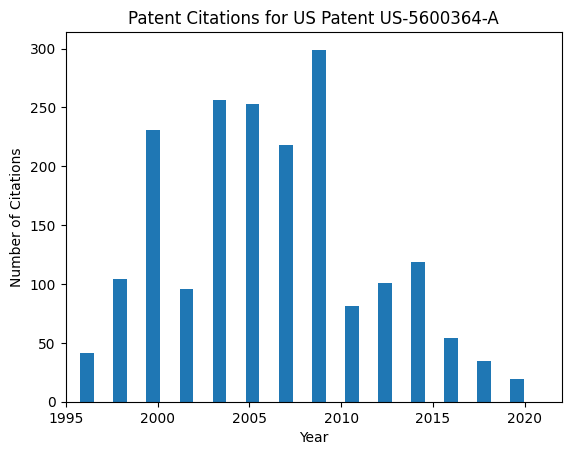

KeyboardInterrupt: 

In [11]:
#This cell visualizes ithe citation curves of patents
#Run me!
u_labels = np.unique(label)
fig = plt.figure(figsize = (8,4))
count = 0
index = 0
for i in range(1990, 2000, 2):
    print("Patents from: " + str(i) + "-" + str(i+2))
#Adjust the third argument in the line below to change which cluster is displayed
    index = index + graph_range(i, index, 1, clustering_backup)
